# N-uncial Proyection: Numerical Implementation

El propósito de este documento es presentar la implementación numérica del artículo "Inverses and n-uncial property of Jacobian elliptic functions" (Solanilla, Leal, Tique, 2021) utilizando el lenguaje de programación Python. Este trabajo se centra en la creación de mapas del planeta Tierra mediante las proyecciones n-unciales, las cuales son obtenidas a partir de la generalización de la propiedad de quincuncialidad de la función elíptica de Jacobi relacionada con la proyección quincuncial de Peirce (Solanilla, Oostra, Yáñez, 2016). A saber, se demostró que todas las funciones elípticas inversas de Jacobi son n-unciales. 

Para lograr la implementación numérica, se emplea el archivo "n_uncial.py" con el código principal, así como el archivo "toolbox.py", que proporciona el código necesario para generar meridianos, paralelos y el mapamundi en coordenadas esféricas, mapear la proyección estereográfica y visualizar cada etapa del proceso.

Cada proyección n-uncial es la composición de la proyección estereográfica con la inversa de una función eliptica de Jacobi. En ese sentido, este cuaderno está dividido en tres secciones:

**1.** En la primera, se importan los archivos "n_uncial.py" y "toolbox.py" para ser usado en las siguientes secciones. Además se cargan los datos geoespaciales de tierra firme y se obtienen sus coordenadas esféricas.

**2.** Se realiza la primera composicion mapeando las coordenadas iniciales con la proyección estereográfica.

**3.** Se transforman las coordenas estereograficas usando cada inversa de las funciones elipticas de Jacobi con modulo $\frac{1}{\sqrt{2}}$, para ser graficadas posteriormente. Como resultado, el mapamundi segun la respectiva proyección n-uncial.


## 1. Importe de archivos y generación de coordenadas esfericas

In [1]:
from Functions.quincuncial import *
from Functions.n_uncial import *
from Functions.toolbox import *
import numpy as np

In [2]:
%%time
data = "data/ne_110m_admin_0_countries.shp" # cargar información geoespacial de los continentes
coord = generar_puntos_en_continentes(data, 100000) #se pasa el numero de puntos aleatorios a dibujar sobre tierra en coordenadas esfericas
coord_esf = [(x[0]+np.pi,x[1]+(np.pi/2)) for x in coord]

#Gráfico de la esfera terrestre generada
#plot_esfera(esfera_terrestre) # depende de la parametrización de esfera

CPU times: user 23.4 s, sys: 24 ms, total: 23.4 s
Wall time: 23.4 s


## 2. Proyección estereográfica

In [3]:
def estereografica(theta, p):
    z = np.tan(p/ 2) * np.exp(1j * theta)
    return z

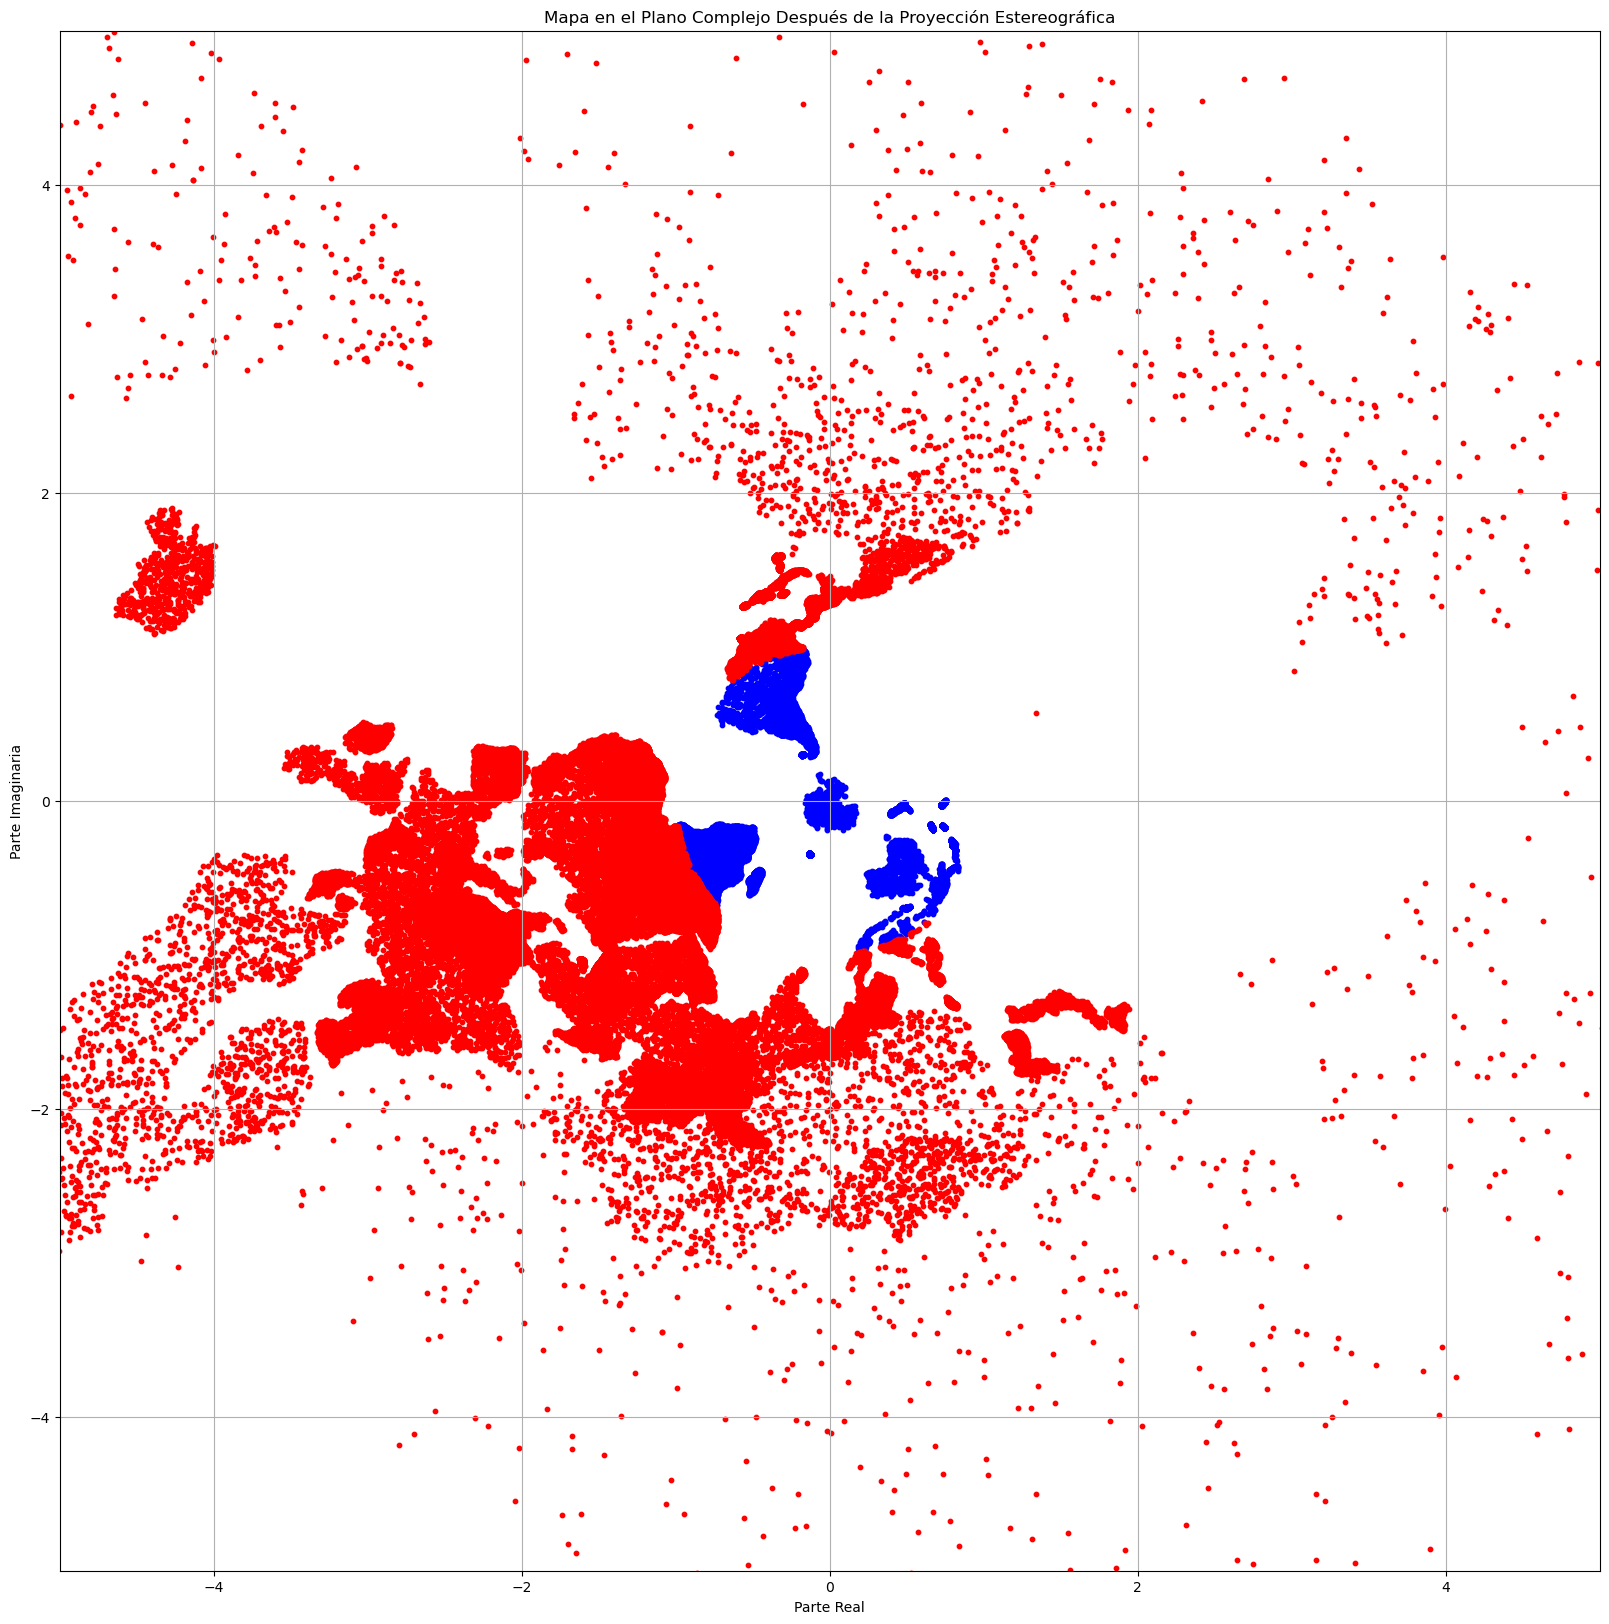

In [4]:
coord_est = []
for punto in coord_esf:
    x = punto[0]
    y = punto[1]
    coord_est.append(estereografica(x, y))
plot_complex_map(coord_est)

## 3. Proyección N-uncial

### 3.1 $cn^{-1}z= F(arc cos z)$

In [21]:
norte_est=[(x[0]+np.pi,x[1]+(np.pi/2)) for x in coord if -1<x[0]<1 and -1<x[1]<1]
norte_est

[(3.836920183333441, 2.1503595017432504),
 (3.1288384955993918, 1.7473986039815534),
 (3.7544336907530544, 2.1134267941446714),
 (3.7533489883302806, 2.119005994480564),
 (3.564990773214596, 2.3213817422075516),
 (3.311423351961339, 2.104053821198783),
 (3.90983842896961, 1.5916514686149092),
 (2.944003858972633, 1.7036423241357725),
 (3.0058267859560113, 2.2287187849998924),
 (3.809195684978821, 2.1856188070403713),
 (3.3879806003109016, 2.3049852267741713),
 (3.9236818719063553, 2.3127289646977425),
 (3.2300510374995772, 2.4422507824528905),
 (3.244680615031808, 2.4359380119107823),
 (4.067728340980149, 1.8818373098450634),
 (3.302165716462732, 2.360124143892819),
 (3.61737244460422, 2.464037106544585),
 (3.2377287861034527, 1.791962094456261),
 (3.7144323222858726, 1.3860928475536156),
 (3.0079049462615424, 2.5200731520050823),
 (3.4323403067854703, 2.381794849374005),
 (3.7030059842822913, 1.6426241515818998),
 (3.5093342776243506, 2.3058054155817826),
 (3.9348522163952646, 2.28115

In [16]:
def cni(punto):
    a=np.real(punto)
    b=np.imag(punto)

    x=ellipf(np.arccos(a), 0.5)
    y=ellipf(np.arccos(b), 0.5)
    return (x,y)

In [18]:
cni((0.1+0.2j))
np.arccos(coord_est[0])

[np.real(punto) for punto in coord_est]

[0.3801263636283259,
 0.5054617806896207,
 -0.9477689610199647,
 -1.4202908747720486,
 -1.1941637542788899,
 -1.4485065702571758,
 -1.459101735874817,
 -2.0970310272059947,
 -1.7263327568956837,
 -0.7342869068750262,
 -1.1202920978132678,
 -2.0178408626018536,
 -1.5158779638467303,
 -2.1815827578311198,
 -0.031238498207967876,
 -1.6126979665839958,
 -2.7315912034398155,
 -3.909729777818691,
 -2.7012337471242196,
 -0.8243992906572555,
 -2.3964639117305992,
 -0.5540270106678652,
 -0.10513157283560054,
 -2.5227891919329117,
 -1.2440385077345666,
 -0.697898611385604,
 -3.085877385915954,
 -0.23355578738488614,
 -2.3993003036314016,
 -0.9095991710755679,
 -2.10144094920188,
 0.8109503440787011,
 0.7906437883482837,
 -0.07347081491061419,
 -3.2739238696606914,
 -1.5287529215005313,
 -2.3311729626506237,
 -0.458005342103813,
 -1.429767975935322,
 -1.1809077248025157,
 -3.3820497693793676,
 -0.8423528719847461,
 3.671480687977267,
 -2.5172625798742407,
 -0.634011238113849,
 -1.0050215810465297

In [20]:
pro=[]
for punto in norte_est:
    pro.append(cni(punto))

x = [float(punto.real) for punto in pro]
y = [float(punto.imag) for punto in pro]

plt.figure(figsize=(15, 15))

# Crear el gráfico
plt.scatter(x, y, s=5)

# Añadir etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de puntos en el plano cartesiano')
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar el gráfico
plt.grid(True)
plt.show()

/tmp/ipykernel_52426/850490058.py:5: RuntimeWarning: invalid value encountered in arccos
  x=ellipf(np.arccos(a), 0.5)


TypeError: cannot create mpf from array([nan, nan])

## 3. Proyección N-uncial

In [ ]:
def dni(punto):
    y=ellipf(np.arccos(punto), 0.5)
    return y